# CVIT Summer Workshop 2020

Day 03 (Morning Session): Feature Matching and Panorama

Instructor: Shreyank Jyoti, Research Assistant, CVIT

In [0]:
!pip uninstall opencv-python -y
# downgrade OpenCV as some non-free features are not available in the later versions
!pip install opencv-contrib-python==3.4.2.17 --force-reinstall

In [0]:
import os
import cv2
import glob
import numpy as np 
import matplotlib.pyplot as plt

## Part 01: Mount Google Drive to Google Colab

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!ls 'drive/My Drive/CVIT Day 4/Feature Matching/'

62.png	box_in_scene.png  box.png


In [0]:
image1=cv2.imread('drive/My Drive/CVIT Day 4/Feature Matching/box.png',cv2.IMREAD_GRAYSCALE)
image2=cv2.imread('drive/My Drive/CVIT Day 4/Feature Matching/box_in_scene.png',cv2.IMREAD_GRAYSCALE)

## Part 02: Feature Matching: ORB and SIFT

### ORB Detector

In [0]:
# Initialize ORB detector
orb = cv2.ORB_create()

# Find the keypoints and descriptors
kp1, des1 = orb.detectAndCompute(image1, None)
kp2, des2 = orb.detectAndCompute(image2, None)

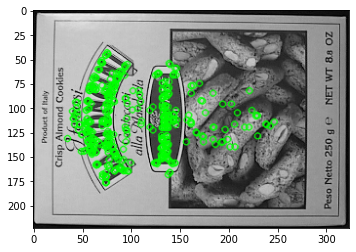

In [0]:
plt.imshow(cv2.drawKeypoints(image1, kp1, None, color = (0, 255, 0)))

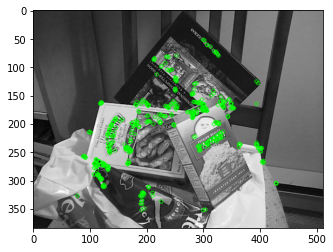

In [0]:
plt.imshow(cv2.drawKeypoints(image2, kp2, None, color = (0, 255, 0)))

### SIFT Detector

In [0]:
# Initialize SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# Find the keypoints and descriptors
kp1, des1 = sift.detectAndCompute(image1, None)
kp2, des2 = sift.detectAndCompute(image2, None)

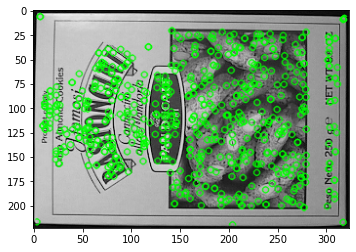

In [0]:
plt.imshow(cv2.drawKeypoints(image1, kp1, None, color = (0, 255, 0)))

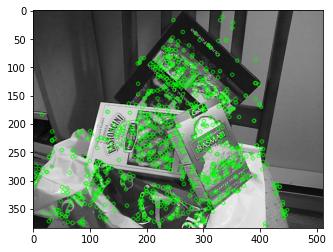

In [0]:
plt.imshow(cv2.drawKeypoints(image2, kp2, None, color = (0, 255, 0)))

## Part 03: Brute Force Matcher

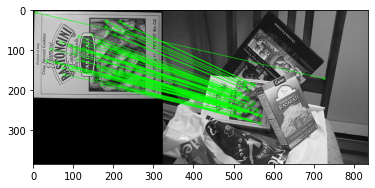

In [0]:
match = cv2.BFMatcher()
matches = match.knnMatch(des1, des2, k = 2)

good = []

for m, n in matches:
  if m.distance < 0.7 * n.distance:
    good.append(m)

draw_params = dict(matchColor = (0, 255, 0), singlePointColor = None, flags = 2)

image3 = cv2.drawMatches(image1, kp1, image2, kp2, good, None, **draw_params)

plt.imshow(image3)

## Part 04: Panorma Stiching (Two Images)

Reference: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_feature_homography/py_feature_homography.html

In [0]:
image1 = cv2.imread('drive/My Drive/CVIT Day 4/Panorama/Eg1/img2_2.png')
image2 = cv2.imread('drive/My Drive/CVIT Day 4/Panorama/Eg1/img2_1.png')

image1_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
image2_gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

### ORB Detector

In [0]:
# Initialize ORB detector
orb = cv2.ORB_create()

# Find the keypoints and descriptors
kp1, des1 = orb.detectAndCompute(image1_gray, None)
kp2, des2 = orb.detectAndCompute(image2_gray, None)

Text(0.5, 0, '(b)')

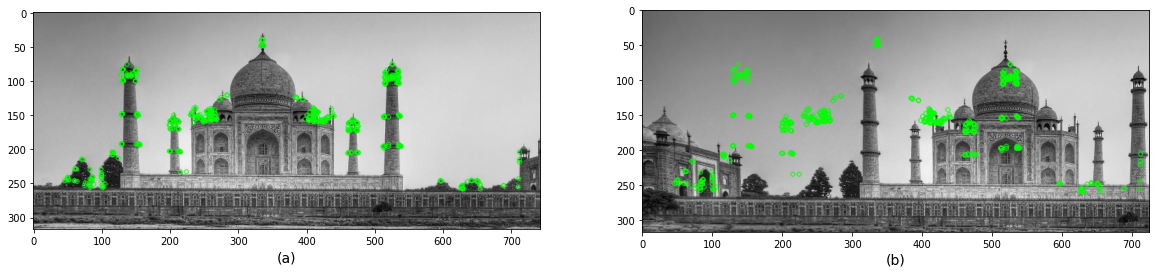

In [0]:
# Display the keypoints and features detected on both images
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize  = (20, 8), constrained_layout = False)

ax1.imshow(cv2.drawKeypoints(image1_gray, kp1, None, color = (0, 255, 0)))
ax1.set_xlabel('(a)', fontsize = 14)

ax2.imshow(cv2.drawKeypoints(image2_gray, kp1, None, color = (0, 255, 0)))
ax2.set_xlabel('(b)', fontsize = 14)

### SIFT Detector

In [0]:
# Initialize SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# Find the keypoints and descriptors
kp1, des1 = sift.detectAndCompute(image1_gray, None)
kp2, des2 = sift.detectAndCompute(image2_gray, None)

Text(0.5, 0, '(b)')

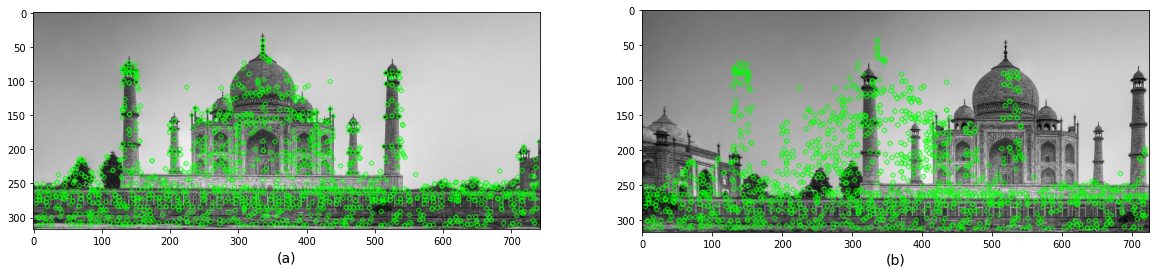

In [0]:
# Display the keypoints and features detected on both images
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize  = (20, 8), constrained_layout = False)

ax1.imshow(cv2.drawKeypoints(image1_gray, kp1, None, color = (0, 255, 0)))
ax1.set_xlabel('(a)', fontsize = 14)

ax2.imshow(cv2.drawKeypoints(image2_gray, kp1, None, color = (0, 255, 0)))
ax2.set_xlabel('(b)', fontsize = 14)

### Brute Force Matcher

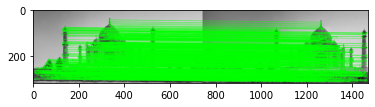

In [0]:
match = cv2.BFMatcher()
matches = match.knnMatch(des1, des2, k = 2)

good = []

for m, n in matches:
  if m.distance < 0.7 * n.distance:
    good.append(m)

draw_params = dict(matchColor = (0, 255, 0), singlePointColor = None, flags = 2)

image3 = cv2.drawMatches(image1_gray, kp1, image2_gray, kp2, good, None, **draw_params)

plt.imshow(image3)

### Homography

In [0]:
MIN_MATCH_COUNT = 10

if len(good) > MIN_MATCH_COUNT:
  src_pts = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
  dst_pts = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)

  M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

  h, w = image2_gray.shape

  pts = np.float32([[0,0], [0, h-1], [w-1, h-1], [w-1, 0]]).reshape(-1, 1, 2)
  dst = cv2.perspectiveTransform(pts, M)
else:
  print("Not enough matches are found - %d / %d", (len(good), MIN_MATCH_COUNT))

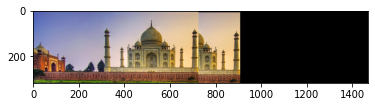

In [0]:
dst = cv2.warpPerspective(image2, M, (image1.shape[1] + image2.shape[1], image2.shape[0]))

dst[0 : image2.shape[0], 0 : image2.shape[1]] = image2
plt.imshow(dst)


## Part 05: Panorama Stiching (Multiple Images)

To read: https://medium.com/analytics-vidhya/image-stitching-with-opencv-and-python-1ebd9e0a6d78

### Image Trimming in Panaroma Stiching

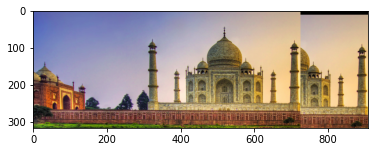

In [0]:
def trim(frame):
  # Crop Top
  if not np.sum(frame[0]):
    return trim(frame[1:])
  # Crop Bottom
  if not np.sum(frame[-1]):
    return trim(frame[:-2])
  # Crop Left
  if not np.sum(frame[:, 0]):
    return trim(frame[:, 1:])
  # Crop Right
  if not np.sum(frame[:, -1]):
    return trim(frame[:, :-2])
  return frame

plt.imshow(trim(dst))

### Panorama Image Stiching: All-in-one

In [0]:
def panorama(path_right, path_left):
  image1 = cv2.imread(path_right)
  image2 = cv2.imread(path_left)

  image1_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
  image2_gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

  image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
  image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

  # Initialize SIFT detector
  sift = cv2.xfeatures2d.SIFT_create()

  # Find the keypoints and descriptors
  kp1, des1 = sift.detectAndCompute(image1_gray, None)
  kp2, des2 = sift.detectAndCompute(image2_gray, None)

  # Display the keypoints and features detected on both images
  # fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize  = (20, 8), constrained_layout = False)

  # ax1.imshow(cv2.drawKeypoints(image1_gray, kp1, None, color = (0, 255, 0)))
  # ax1.set_xlabel('(a)', fontsize = 14)

  # ax2.imshow(cv2.drawKeypoints(image2_gray, kp1, None, color = (0, 255, 0)))
  # ax2.set_xlabel('(b)', fontsize = 14)

  # Brute Force Matcher
  match = cv2.BFMatcher()
  matches = match.knnMatch(des1, des2, k = 2)

  good = []

  for m, n in matches:
    if m.distance < 0.7 * n.distance:
      good.append(m)

  draw_params = dict(matchColor = (0, 255, 0), singlePointColor = None, flags = 2)

  image3 = cv2.drawMatches(image1_gray, kp1, image2_gray, kp2, good, None, **draw_params)

  # plt.imshow(image3)

  MIN_MATCH_COUNT = 10

  if len(good) > MIN_MATCH_COUNT:
    src_pts = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)

    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    h, w = image2_gray.shape

    pts = np.float32([[0,0], [0, h-1], [w-1, h-1], [w-1, 0]]).reshape(-1, 1, 2)
    dst = cv2.perspectiveTransform(pts, M)
  else:
    print("Not enough matches are found - %d / %d", (len(good), MIN_MATCH_COUNT))
    return 

  dst = cv2.warpPerspective(image2, M, (image1.shape[1] + image2.shape[1], image2.shape[0]))

  dst[0 : image2.shape[0], 0 : image2.shape[1]] = image2
  # plt.imshow(dst)

  return(trim(dst))

### Panaroma Image Stiching: Another Example

False

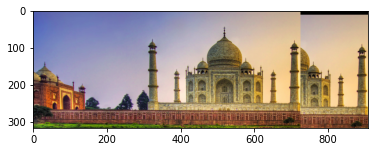

In [53]:
root = 'drive/My Drive/CVIT Day 4/Panorama/Eg1/'

images = os.listdir(root)

path_right = root + images[1]
path_left = root + images[0]

image_new = panorama(path_right, path_left)

plt.imshow(image_new)

cv2.imwrite(save_image, cv2.cvtColor(image_new, cv2.COLOR_RGB2BGR))

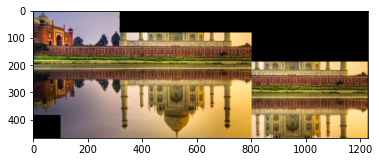

In [45]:
root = 'drive/My Drive/CVIT Day 4/Panorama/Eg2/'

images = os.listdir(root)
save_path = 'drive/My Drive/CVIT Day 4/Panorama/Outputs/Eg2/'

for i in range(len(images) - 1):
  path_right = root + images[i + 1]

  if i == 0:
    path_left = root + images[i]
  else:
    path_left = save_image

  image_new = panorama(path_right, path_left)
  save_image = save_path + images[i + 1][ : -4] + "output.png"

  plt.imshow(image_new)

  cv2.imwrite(save_image, cv2.cvtColor(image_new, cv2.COLOR_RGB2BGR))

In [0]:
root = 'drive/My Drive/CVIT Day 4/Panorama/Eg3/'

images = os.listdir(root)
save_path = 'drive/My Drive/CVIT Day 4/Panorama/Outputs/Eg3/'

for i in range(len(images) - 1):
  path_right = root + images[i + 1]

  if i == 0:
    path_left = root + images[i]
  else:
    path_left = save_image

  image_new = panorama(path_right, path_left)
  save_image = save_path + images[i + 1][ : -4] + "output.png"

  plt.imshow(image_new)

  cv2.imwrite(save_image, cv2.cvtColor(image_new, cv2.COLOR_RGB2BGR))